In [47]:
import scanpy
import numpy as np
import pandas as pd
import sys
sys.path.append('..')
from utils import *
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
adata_beta = scanpy.read_h5ad('../data/beta_run_2.h5ad')
adata_beta_wt = adata_beta[adata_beta.obs['samples'] == 'WT']

In [51]:
colors = list(sns.color_palette('Set1', n_colors=4)) + \
list(sns.color_palette('Paired', n_colors=3)) + ['lightgray'] + \
list(sns.color_palette('Set2', n_colors=7).as_hex())

at_cmap = dict(zip(adata_beta.obs['AT_committment'].cat.categories, colors))
at_order = ['WT AT 1', 'WT AT 2', 'WT AT 3', 'WT AT 4', 'WT AT 5', 'WT AT 6', 'WT AT 7',
            'HFD AT 1', 'HFD AT 2', 'HFD AT 3', 'HFD AT 4', 'OB/OB AT 1', 'OB/OB AT 2', 'OB/OB AT 3', 'Uncommitted']
at_cmap = dict(zip(at_order, [at_cmap[key] for key in at_order]))

In [86]:
backwards_trajectories_to_obob2 = np.load('results/islet_run_combined_magic_pca_5_tp_run1_growth/backward_trajectories_OBOB_AT2.npy')
nearest_cells = get_cells_of_origin(backwards_trajectories_to_obob2,
                                    adata_beta_wt.obsm['combined_magic_pc_norm'][:, :10])
observed = adata_beta_wt.obs.iloc[nearest_cells]['AT_committment'].value_counts() / backwards_trajectories_to_obob2.shape[1]
expected = adata_beta_wt.obs['AT_committment'].value_counts() / adata_beta_wt.n_obs
df1 = observed/expected

In [95]:
backwards_trajectories_to_obob2 = np.load('results/islet_run_combined_magic_pca_5_tp_run2_growth/backward_trajectories_OBOB_AT2.npy')
nearest_cells = get_cells_of_origin(backwards_trajectories_to_obob2,
                                    adata_beta_wt.obsm['combined_magic_pc_norm'][:, :10])
observed = adata_beta_wt.obs.iloc[nearest_cells]['AT_committment'].value_counts() / backwards_trajectories_to_obob2.shape[1]
expected = adata_beta_wt.obs['AT_committment'].value_counts() / adata_beta_wt.n_obs
df2 = observed/expected

In [99]:
df = pd.concat((df1, df2))

/tmp/ipykernel_98180/3623328162.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df.index,
/tmp/ipykernel_98180/3623328162.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


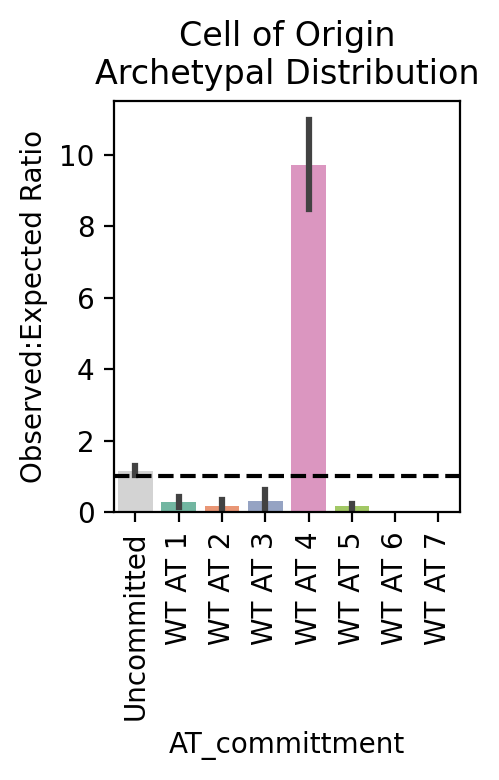

In [100]:
matplotlib.rc_file_defaults()
f = plt.figure(dpi=200, figsize=(2.5,4))
plt.title('Cell of Origin\nArchetypal Distribution', color='black')

ax = sns.barplot(x=df.index,
            y=df.values,
            palette=at_cmap)

plt.axhline(1, c='black', linestyle='dashed')
plt.ylabel('Observed:Expected Ratio')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.tight_layout()
f.savefig(f'figures/OB_OB_2_cell_of_origin_archetypal_distributions.png', dpi=200)